# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [3]:
# Save config information
units = "Imperial"
url = "http://api.openweathermap.org/data/2.5/weather?" + '&APPID=' + weather_api_key + '&units' + units + "&q="


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Create lists for data from csv 
#change to dict and append to list, so each city will be a list
city_id = []
name = []
lat = []
lon = []
temp = []
wind = []
humidity = []
clouds = []
speed = []
country = []
cities_data = []

In [11]:
city_data

{'coord': {'lon': -61.6442, 'lat': -3.7728},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 296.3,
  'feels_like': 297.2,
  'temp_min': 296.3,
  'temp_max': 296.3,
  'pressure': 1011,
  'humidity': 97,
  'sea_level': 1011,
  'grnd_level': 1008},
 'visibility': 10000,
 'wind': {'speed': 0.7, 'deg': 322, 'gust': 0.7},
 'rain': {'1h': 0.56},
 'clouds': {'all': 99},
 'dt': 1620083955,
 'sys': {'country': 'BR', 'sunrise': 1620036251, 'sunset': 1620079353},
 'timezone': -14400,
 'id': 3665315,
 'name': 'Anori',
 'cod': 200}

In [12]:
# Creating For Loop to perform weather check using API call
for city in cities: #Change only10 back to cities to run for all
    
    
    #Try except statements for append
    try:
        city_data = requests.get(url + city).json()
        name = city_data['name']
        lat = city_data['coord']['lat']
        lon = city_data['coord']['lon']
        temp = city_data['main']['temp']
        humidity = city_data['main']['humidity']
        speed = city_data['wind']['speed']
        clouds = city_data['clouds']['all']
        
        cities_data.append({
            "Name" : name,
            "Lat" : lat,
            "Lon" : lon,
            "Temp" : temp,
            "Humidity" : humidity,
            "WindSpeed" : speed,
            "Clouds" : clouds
        })
        print(city)
    except:
        print("City not Found")

    
print("-------------------------------------------")
print("It's done. Data is here.")
print("-------------------------------------------")
        


rikitea
punta arenas
hilo
avarua
mataura
ponta do sol
vaini
ushuaia
manokwari
tual
ancud
aklavik
progreso
te anau
jerusalem
cape town
albany
atuona
City not Found
alofi
City not Found
qaanaaq
cherskiy
bluff
caravelas
City not Found
City not Found
luderitz
pisco
busselton
hobart
santa fe
muros
hermanus
pinega
axim
georgetown
ukiah
erenhot
beaufort
City not Found
dobson
san patricio
victoria
maragogi
port alfred
margosatubig
los llanos de aridane
City not Found
saint-pierre
east london
bom jesus
lasa
broome
pocatello
leh
san-pedro
naze
butaritari
City not Found
City not Found
sao raimundo nonato
kavieng
camopi
mar del plata
nikolskoye
polson
City not Found
quelimane
belmonte
beringovskiy
omsukchan
tasiilaq
severo-kurilsk
whitehorse
sao felix do xingu
faya
kendari
City not Found
tarauaca
dudinka
karanganom
pueblo
kamenka
puerto ayora
creel
vardo
saint-leu
tarko-sale
bathsheba
dali
xiongzhou
saint george
grindavik
komsomolskiy
klaksvik
bilibino
khatanga
alugan
castro
City not Found
santona

In [ ]:
#DO NOT RUN! 
#Next 7 cells checking length of each list 

In [13]:
#len(cities)

608

In [18]:
#cities_data = cities_data[555:]
#Start with entry 555 and return them to the end
#chopped of the extra 555
#making sure it worked

#colon in front give me first 555,colon in back last 555

In [19]:
len(cities_data)

555

In [20]:
cities_data[0]

{'Name': 'Rikitea',
 'Lat': -23.1203,
 'Lon': -134.9692,
 'Temp': 299.28,
 'Humidity': 83,
 'WindSpeed': 7.55,
 'Clouds': 79}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
#Created dictionary
city_weather = pd.DataFrame(cities_data)

In [22]:
#Display dataframe(FINALY!)

city_weather.head()

Name      Lat       Lon    Temp  Humidity  WindSpeed  Clouds
0       Rikitea -23.1203 -134.9692  299.28        83       7.55      79
1  Punta Arenas -53.1500  -70.9167  277.09        70       6.17      75
2          Hilo  19.7297 -155.0900  297.53        57       4.63      75
3        Avarua -21.2078 -159.7750  300.15        65       3.09      75
4       Mataura -46.1927  168.8643  287.59        81       3.58     100

In [24]:
#Attempt 1 to print
#Printed empty csv

city_weather.to_csv('cityweather.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
#Test humidity to identify those with humidity>100%

humidity_test = city_weather["Humidity"].describe(include = "all")
humidity_test

count    555.000000
mean      70.097297
std       22.507630
min        5.000000
25%       58.000000
50%       76.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [29]:
(city_weather["Humidity"]>100).value_counts()

False    555
Name: Humidity, dtype: int64

In [30]:
print("The maximum humidity value is 100%. There are no values greater than 100% in my data!")

The maximum humidity value is 100%. There are no values greater than 100% in my data!


In [35]:
# Get the indices of cities that have humidity over 100%.
dirty_humd = city_weather[(city_weather["Humidity"]>100)].index

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity  outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [36]:
clean_city_data = city_weather.drop(dirty_humd,inplace=False)

In [37]:
clean_city_data.head()

Name      Lat       Lon    Temp  Humidity  WindSpeed  Clouds
0       Rikitea -23.1203 -134.9692  299.28        83       7.55      79
1  Punta Arenas -53.1500  -70.9167  277.09        70       6.17      75
2          Hilo  19.7297 -155.0900  297.53        57       4.63      75
3        Avarua -21.2078 -159.7750  300.15        65       3.09      75
4       Mataura -46.1927  168.8643  287.59        81       3.58     100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

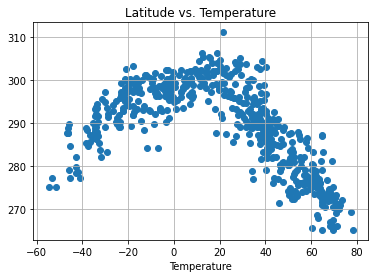

In [40]:
plt.scatter(city_weather['Lat'], city_weather['Temp'])
plt.title('Latitude vs. Temperature')
plt.xlabel('Temperature')
plt.grid(True)
plt.savefig('Figure_1.png')

## Latitude vs. Humidity Plot

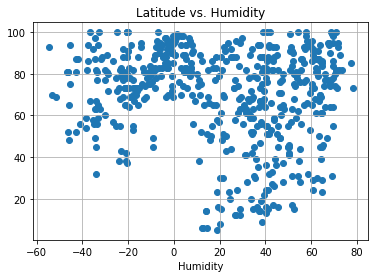

In [41]:
plt.scatter(city_weather['Lat'], city_weather ['Humidity'])
plt.title('Latitude vs. Humidity')
plt.xlabel('Humidity')
plt.grid(True)
plt.savefig('Figure2.png')

## Latitude vs. Cloudiness Plot

In [42]:
plt.scatter(city_weather['Lat'], city_weather ['Clouds'])
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Cloudiness')
plt.grid(True)
plt.savefig('Figure3.png')

## Latitude vs. Wind Speed Plot

In [43]:
plt.scatter(city_weather['Lat'], city_weather ['WindSpeed'])
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Wind Speed')
plt.grid(True)
plt.savefig('Figure4.png')

In [ ]:
#USE MARKDOWN IN DROPDOWN TO ADD TEXT.FOLLOW INSTRUCTIONS FROM MARKDOWN TEMPLATE ON DESKTOP.

##### Magical. Add words 



## Linear Regression

In [ ]:
 # Add the linear regression equation and line to plot
    #example from class activity 
x_values = northern['Temp']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.show()

In [47]:
#testing 
#city_weather[(city_weather["Lat"]<0)]

Name      Lat       Lon    Temp  Humidity  WindSpeed  Clouds
0          Rikitea -23.1203 -134.9692  299.28        83       7.55      79
1     Punta Arenas -53.1500  -70.9167  277.09        70       6.17      75
3           Avarua -21.2078 -159.7750  300.15        65       3.09      75
4          Mataura -46.1927  168.8643  287.59        81       3.58     100
6            Vaini -21.2000 -175.2000  298.15        73       5.14      75
..             ...      ...       ...     ...       ...        ...     ...
542        Itarema  -2.9248  -39.9167  298.73        83       3.58      56
545        Humaitá  -7.5061  -63.0208  296.85        96       0.18      82
547         Mwense -10.3845   28.6980  292.71        75       4.01     100
549  Fuerte Olimpo -21.0415  -57.8738  302.48        42       2.15      67
554          Anori  -3.7728  -61.6442  296.30        97       0.70      99

[177 rows x 7 columns]

In [50]:
#Northern Hemisphere DataFrame

northern = city_weather[(city_weather["Lat"]>0)]
northern

Name      Lat       Lon    Temp  Humidity  WindSpeed  \
2                  Hilo  19.7297 -155.0900  297.53        57       4.63   
5          Ponta do Sol  32.6667  -17.1000  287.38        67       4.63   
11              Aklavik  68.2191 -135.0107  272.15        64       2.06   
12             Progreso  21.2833  -89.6667  311.03        30       6.69   
14            Jerusalem  31.7690   35.2163  295.93        28       0.89   
..                  ...      ...       ...     ...       ...        ...   
548  Acapulco de Juárez  16.8634  -99.8901  302.15        65       4.12   
550         Kostomuksha  64.5710   30.5767  271.59        84       4.18   
551               Arlit  18.7369    7.3853  303.84         5       3.75   
552              Muisne   0.6000  -80.0333  299.15        89       1.54   
553            Zharkent  44.1628   80.0000  287.60        39       2.36   

     Clouds  
2        75  
5        40  
11       20  
12       75  
14        5  
..      ...  
548      40  
550     100  
551       0  
552      75  
553      74  

[378 rows x 7 columns]

In [51]:
#Southern Hemisphere DataFrame

southern = city_weather[(city_weather["Lat"]<0)]
southern

Name      Lat       Lon    Temp  Humidity  WindSpeed  Clouds
0          Rikitea -23.1203 -134.9692  299.28        83       7.55      79
1     Punta Arenas -53.1500  -70.9167  277.09        70       6.17      75
3           Avarua -21.2078 -159.7750  300.15        65       3.09      75
4          Mataura -46.1927  168.8643  287.59        81       3.58     100
6            Vaini -21.2000 -175.2000  298.15        73       5.14      75
..             ...      ...       ...     ...       ...        ...     ...
542        Itarema  -2.9248  -39.9167  298.73        83       3.58      56
545        Humaitá  -7.5061  -63.0208  296.85        96       0.18      82
547         Mwense -10.3845   28.6980  292.71        75       4.01     100
549  Fuerte Olimpo -21.0415  -57.8738  302.48        42       2.15      67
554          Anori  -3.7728  -61.6442  296.30        97       0.70      99

[177 rows x 7 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

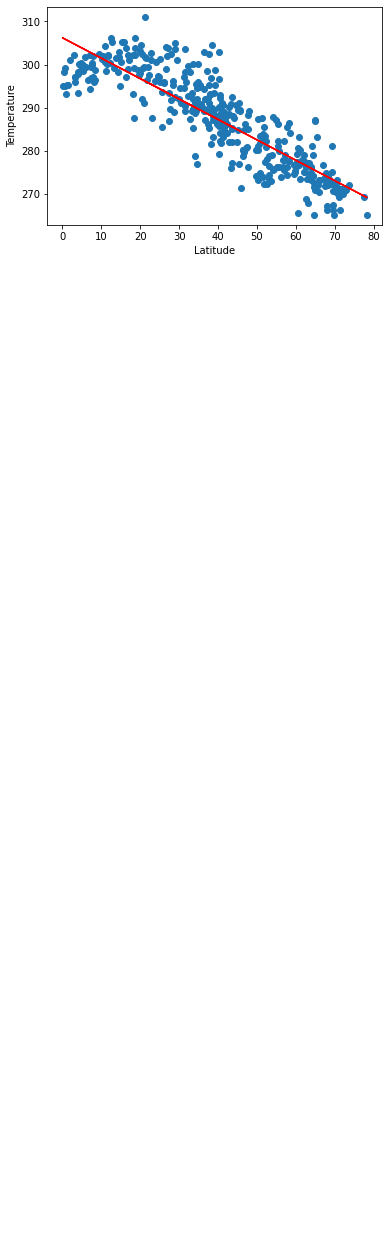

In [56]:
x_values = northern['Lat']
y_values = northern['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [57]:
x_values = southern['Lat']
y_values = southern['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [58]:
x_values = northern['Lat']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

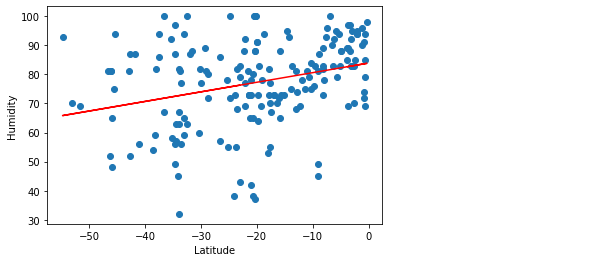

In [59]:
x_values = southern['Lat']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

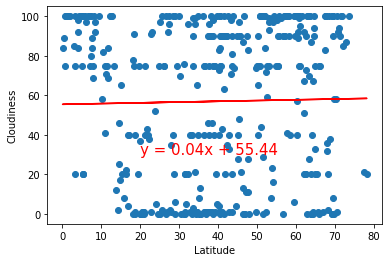

In [60]:
x_values = northern['Lat']
y_values = northern['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [61]:
x_values = southern['Lat']
y_values = southern['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

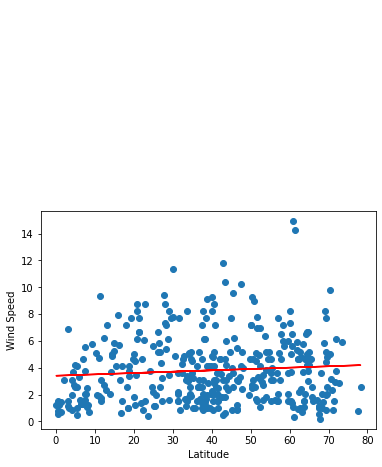

In [62]:
x_values = northern['Lat']
y_values = northern['WindSpeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [63]:
x_values = southern['Lat']
y_values = southern['WindSpeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()